In [2]:
from mflex.model.field.utility.poloidal import phi, phi_low, phi_hypgeo, dphidz_hypgeo, dphidz, dphidz_low
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nresol_x = 100
nresol_y = 100
nresol_z = 400
xmin = 0.0
xmax = 2.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 2.0
zmin = 0.0
zmax = 2.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z
nf_max = 100
length_scale = 2.0
length_scale_x = 2.0 * nresol_x * float(pixelsize_x)
length_scale_y = 2.0 * nresol_y * float(pixelsize_y)
length_scale_x_norm = length_scale_x / length_scale
length_scale_y_norm = length_scale_y / length_scale

In [4]:
z0 = 0.2
deltaz = z0 / 10.0

# Height profile f parameters
a = 0.24
alpha = 0.5
b = 1.0

# Magnitc field parameters
z0_b = 0.4
deltaz_b = 0.05
a_low = a * (1 - np.tanh(-z0_b / deltaz_b))
kappa = 1 / deltaz_b

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

kx_arr = np.arange(nf_max) * np.pi / length_scale_x_norm  # [0:nf_max]
ky_arr = np.arange(nf_max) * np.pi / length_scale_y_norm  # [0:nf_max]
one_arr = 0.0 * np.arange(nf_max) + 1.0
ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]
k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale) ** 2

ratiodzls = deltaz_b / length_scale
p_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a - a * b) - alpha**2)
q_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a + a * b) - alpha**2)

deltaz = 1.0 / kappa
ratiodzls = deltaz / length_scale
p_arr_low = 0.5 * ratiodzls * np.sqrt(k2_arr - alpha**2)
q_arr_low = 0.5 * ratiodzls * np.sqrt(k2_arr * a)

phi_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
phi_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
phi_expo = np.zeros((nresol_y, nresol_x, nresol_z))
x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

In [5]:
phi_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
phi_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
phi_exp = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_exp = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
for ix in range(nresol_x):
    for iy in range(nresol_y):
        p = p_arr[iy, ix]
        q = q_arr[iy, ix]
        p_low = p_arr_low[iy, ix]
        q_low = q_arr_low[iy, ix]
        for iz in range(nresol_z):
            z = z_arr[iz]
            phi_hyper[iy, ix, iz] = phi_hypgeo(z, p, q, z0_b, deltaz_b)
            phi_asymp[iy, ix, iz] = phi(z, p, q, z0_b, deltaz_b)
            phi_exp[iy, ix, iz] = phi_low(z, p_low, q_low, kappa)
            dphidz_hyper[iy, ix, iz] = dphidz_hypgeo(z, p, q, z0_b, deltaz_b)
            dphidz_asymp[iy, ix, iz] = dphidz(z, p, q, z0_b, deltaz_b)
            dphidz_exp[iy, ix, iz] = dphidz_low(z, p_low, q_low, kappa)

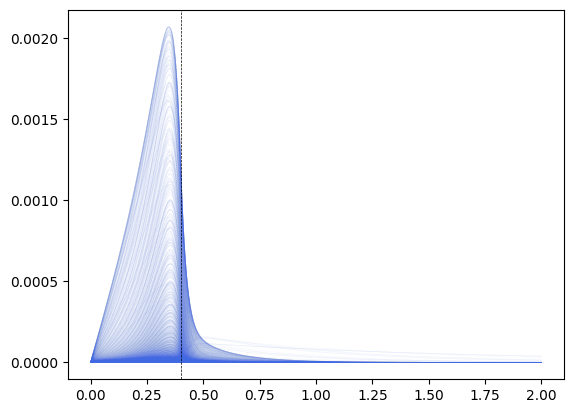

In [6]:
for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        #plt.plot(z_arr, phi_hyper[iy, ix, :], linewidth=0.5, color="magenta", alpha=0.04)
        #plt.plot(z_arr, phi_asymp[iy, ix, :], linewidth=0.5, color="royalblue", alpha=0.04)
        #plt.plot(z_arr, phi_exp[iy, ix, :], linewidth=0.5, color="orange", alpha=0.04)
        plt.plot(z_arr, abs(phi_hyper[iy, ix, :]-phi_asymp[iy, ix, :]), linewidth=0.5, color="royalblue", alpha=0.04)
plt.axvline(x=z0_b, color="black", linestyle="dashed", linewidth=0.5)
#plt.xlim([0.0, 0.5])
plt.show()

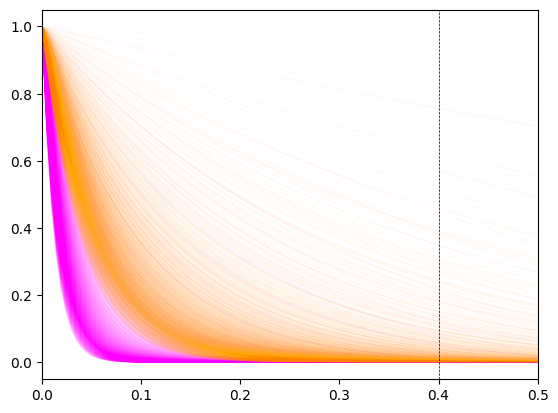

In [7]:
for ix in range(0, nresol_x, 3):
    for iy in range(0, nresol_y, 2):
        plt.plot(z_arr, phi_hyper[iy, ix, :], linewidth=0.5, color="magenta", alpha=0.04)
        #plt.plot(z_arr, phi_asymp[iy, ix, :], linewidth=0.5, color="royalblue", alpha=0.04)
        plt.plot(z_arr, phi_exp[iy, ix, :], linewidth=0.5, color="orange", alpha=0.04)
plt.axvline(x=z0_b, color="black", linestyle="dashed", linewidth=0.5)
plt.xlim([0.0, 0.5])
plt.show()

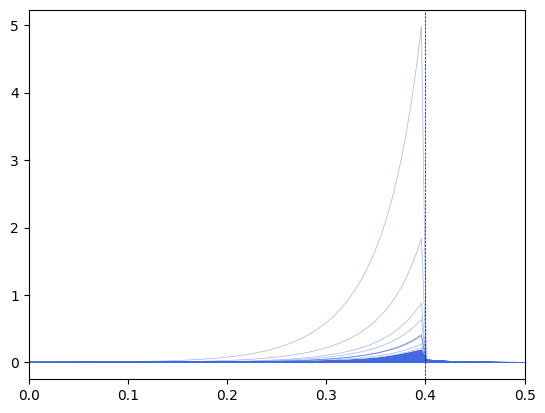

In [15]:
for ix in range(0, nresol_x, 3):
    for iy in range(0, nresol_y, 2):
        #plt.plot(z_arr, dphidz_hyper[iy, ix, :], linewidth=0.5, color="magenta", alpha=0.04)
        #plt.plot(z_arr, dphidz_asymp[iy, ix, :], linewidth=0.5, color="royalblue", alpha=0.04)
        plt.plot(z_arr, abs(dphidz_hyper[iy, ix, :]-dphidz_asymp[iy, ix, :]), linewidth=0.5, color="royalblue", alpha = 0.5)
        #plt.plot(z_arr, dphidz_exp[iy, ix, :], linewidth=0.5, color="orange", alpha=0.04)
plt.axvline(x=z0_b, color="black", linestyle="dashed", linewidth=0.5)
plt.xlim([0.0, 0.5])
plt.show()

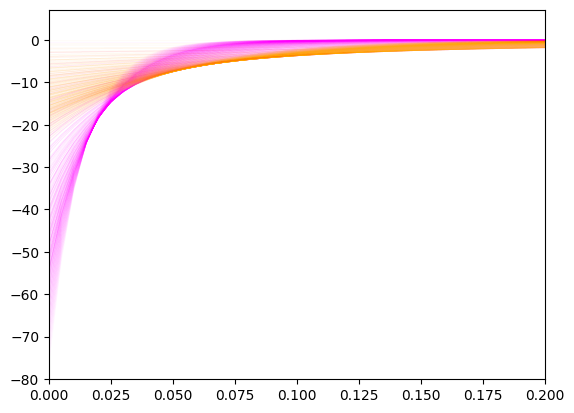

In [9]:
for ix in range(0, nresol_x, 5):
    for iy in range(0, nresol_y,5):
        plt.plot(z_arr, dphidz_hyper[iy, ix, :], linewidth=0.5, color="magenta", alpha=0.04)
        #plt.plot(z_arr, dphidz_asymp[iy, ix, :], linewidth=0.5, color="royalblue", alpha=0.04)
        #plt.plot(z_arr, abs(dphidz_hyper[iy, ix, :]-dphidz_asymp[iy, ix, :]), linewidth=0.5, color="royalblue", alpha=0.1)
        plt.plot(z_arr, dphidz_exp[iy, ix, :], linewidth=0.5, color="orange", alpha=0.04)
plt.axvline(x=z0_b, color="black", linestyle="dashed", linewidth=0.5)
plt.xlim([0.0, 0.2])
plt.show()

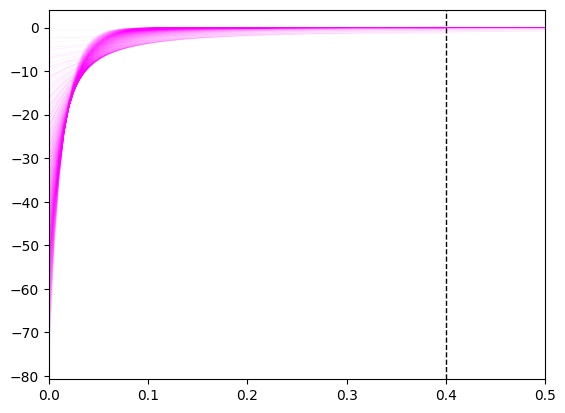

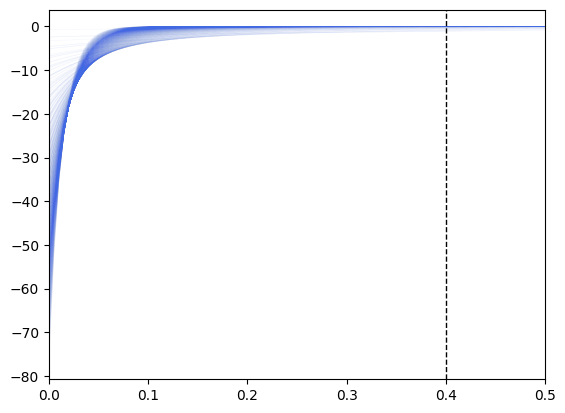

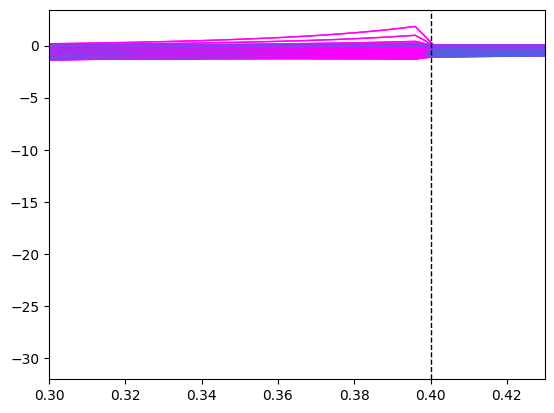

In [26]:
for ix in range(0, nresol_x, 4):
    for iy in range(0, nresol_y,4):
        plt.plot(z_arr, dphidz_hyper[iy, ix, :], linewidth=0.5, color="magenta", alpha=0.04)
        #plt.plot(z_arr, dphidz_asymp[iy, ix, :], linewidth=0.5, color="royalblue", alpha=0.04)
        #plt.plot(z_arr, abs(dphidz_hyper[iy, ix, :]-dphidz_asymp[iy, ix, :]), linewidth=0.5, color="royalblue", alpha=0.1)
        #plt.plot(z_arr, dphidz_exp[iy, ix, :], linewidth=0.5, color="orange", alpha=0.04)
plt.axvline(x=z0_b, color="black", linestyle="dashed", linewidth=1.0)
plt.xlim([0.0, 0.5])
plt.show()
for ix in range(0, nresol_x, 4):
    for iy in range(0, nresol_y,4):
        #plt.plot(z_arr, dphidz_hyper[iy, ix, :], linewidth=0.5, color="magenta", alpha=0.04)
        plt.plot(z_arr, dphidz_asymp[iy, ix, :], linewidth=0.5, color="royalblue", alpha=0.04)
        #plt.plot(z_arr, abs(dphidz_hyper[iy, ix, :]-dphidz_asymp[iy, ix, :]), linewidth=0.5, color="royalblue", alpha=0.1)
        #plt.plot(z_arr, dphidz_exp[iy, ix, :], linewidth=0.5, color="orange", alpha=0.04)
plt.axvline(x=z0_b, color="black", linestyle="dashed", linewidth=1.0)
plt.xlim([0.0, 0.5])
plt.show()
for ix in range(0, 40, 2):
    for iy in range(0, 40,2):
        plt.plot(z_arr, dphidz_hyper[iy, ix, :], linewidth=1.0, color="magenta", alpha=1)
        plt.plot(z_arr, dphidz_asymp[iy, ix, :], linewidth=1.0, color="royalblue", alpha=1)
        #plt.plot(z_arr, abs(dphidz_hyper[iy, ix, :]-dphidz_asymp[iy, ix, :]), linewidth=0.5, color="royalblue", alpha=0.1)
        #plt.plot(z_arr, dphidz_exp[iy, ix, :], linewidth=0.5, color="orange", alpha=0.04)
plt.axvline(x=z0_b, color="black", linestyle="dashed", linewidth=1.0)
plt.xlim([0.3, 0.43])
plt.show()